In [2]:
l1 = ["1", "2", "3", "4", "5", "6"]

l_even = [num for num in l1 if int(num)%2 == 0]

l_even

['2', '4', '6']

In [6]:
import pandas as pd

from numpy.random import randint

In [25]:
time_series = pd.date_range(start="2021-09-01 00:00:00", 
                            end="2021-09-07 23:59:59",
                            freq="1min"
                           )

random_Os_1s = randint(low=0, high=2, size=time_series.shape[0])

In [42]:
df1 = pd.DataFrame({
    "time_series": time_series,
    "numbers": random_Os_1s
})

df1.set_index("time_series", inplace=True)

df1.head()

,numbers
time_series,
2021-09-01 00:00:00,0
2021-09-01 00:01:00,1
2021-09-01 00:02:00,0
2021-09-01 00:03:00,1
2021-09-01 00:04:00,1


In [29]:
import matplotlib.pyplot as plt

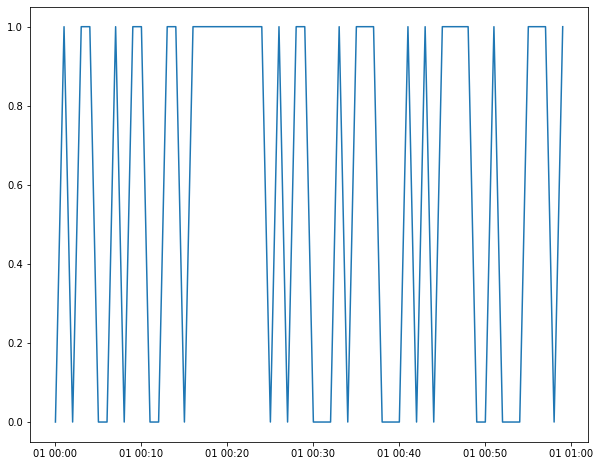

In [37]:
temp_df = df1["2021-09-01 00:00:00": "2021-09-01 00:59:59"]

# temp_df
             

        
plt.figure(figsize=(10, 8))

plt.plot(temp_df.index, temp_df.numbers)
plt.show()

In [35]:
temp_df["2021-09-01 00:16:00": "2021-09-01 00:25:00"]

,numbers
time_series,
2021-09-01 00:15:00,0
2021-09-01 00:16:00,1
2021-09-01 00:17:00,1
2021-09-01 00:18:00,1
2021-09-01 00:19:00,1
2021-09-01 00:20:00,1
2021-09-01 00:21:00,1
2021-09-01 00:22:00,1
2021-09-01 00:23:00,1


In [43]:
df1 = df1.reset_index()


,time_series,numbers
0,2021-09-01 00:00:00,0
1,2021-09-01 00:01:00,1
2,2021-09-01 00:02:00,0
3,2021-09-01 00:03:00,1
4,2021-09-01 00:04:00,1
...,...,...
10075,2021-09-07 23:55:00,0
10076,2021-09-07 23:56:00,0
10077,2021-09-07 23:57:00,1
10078,2021-09-07 23:58:00,0


In [49]:


# Grouping by the cumsum and counting the number of dates and getting their min and max
# df = df.groupby(df['A'].cumsum()).agg(
#     {'index': ['count', 'min', 'max']})

# # Removing useless column level
# df.columns = df.columns.droplevel()

# print(df)
# #    count        min        max
# # A                             
# # 1      1 2015-05-01 2015-05-01
# # 2      5 2015-05-02 2015-05-06
# # 3      3 2015-05-07 2015-05-09

# # Getting the max
# df[df['count']==df['count'].max()]

#    count        min        max
# A                             
# 2      5 2015-05-02 2015-05-06

df_grouped = df1.groupby(df1["numbers"].cumsum()).agg({"time_series": ["count", "min", "max"]})
df_grouped.columns = df_grouped.columns.droplevel()

# df_grouped[df_grouped.count == df_grouped.count.max()]

df_grouped

,count,min,max
numbers,,,
0,1,2021-09-01 00:00:00,2021-09-01 00:00:00
1,2,2021-09-01 00:01:00,2021-09-01 00:02:00
2,1,2021-09-01 00:03:00,2021-09-01 00:03:00
3,3,2021-09-01 00:04:00,2021-09-01 00:06:00
4,2,2021-09-01 00:07:00,2021-09-01 00:08:00
...,...,...,...
5008,2,2021-09-07 23:51:00,2021-09-07 23:52:00
5009,1,2021-09-07 23:53:00,2021-09-07 23:53:00
5010,3,2021-09-07 23:54:00,2021-09-07 23:56:00


In [51]:
df_grouped["count"].max()

16

In [52]:
df_grouped[df_grouped["count"] == df_grouped["count"].max()]

,count,min,max
numbers,,,
1973,16,2021-09-03 18:11:00,2021-09-03 18:26:00


In [ ]:
df1["2021-09-03 18:11:00": "2021-09-03 18:26:00"]

In [39]:
# Test data
df= pd.DataFrame([True, True, False, False, False, False, True, False, False], 
              index=pd.to_datetime(['2015-05-01', '2015-05-02', '2015-05-03',
                                   '2015-05-04', '2015-05-05', '2015-05-06',
                                   '2015-05-07', '2015-05-08', '2015-05-09']), 
              columns=['A'])

# We have to ensure that the index is sorted
df.sort_index(inplace=True)
# Resetting the index to create a column
df.reset_index(inplace=True)


df
# # Grouping by the cumsum and counting the number of dates and getting their min and max
# df = df.groupby(df['A'].cumsum()).agg(
#     {'index': ['count', 'min', 'max']})

# # Removing useless column level
# df.columns = df.columns.droplevel()

# print(df)
# #    count        min        max
# # A                             
# # 1      1 2015-05-01 2015-05-01
# # 2      5 2015-05-02 2015-05-06
# # 3      3 2015-05-07 2015-05-09

# # Getting the max
# df[df['count']==df['count'].max()]

# #    count        min        max
# # A                             
# # 2      5 2015-05-02 2015-05-06

,index,A
0,2015-05-01,True
1,2015-05-02,True
2,2015-05-03,False
3,2015-05-04,False
4,2015-05-05,False
5,2015-05-06,False
6,2015-05-07,True
7,2015-05-08,False
8,2015-05-09,False


In [28]:
df["numbers"].value_counts()

0    5068
1    5012
Name: numbers, dtype: int64